In [172]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [173]:
main_df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv')
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [174]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [175]:
duplicated = main_df[main_df.duplicated()]

print(duplicated)

main_df = main_df.drop_duplicates()

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [176]:
# Get each column type and check if there are more than one type per column to unify them
column_types = main_df.dtypes

formatted_types = {
    column: column_types[column].name if column_types[column] != 'bool' else 'boolean' 
    for column in main_df.columns
}

def get_types_per_column(df_columns):
    for column in df_columns:
        column_types = main_df[column].apply(type).unique()
        if len(column_types) > 1:
            type_names = [t.__name__ for t in column_types]
            print(f'{column}: <{type_names}>')
        else:
            print(f'{column}: <{column_types[0].__name__}>')

get_types_per_column(main_df.columns)

age: <int>
job: <str>
marital: <str>
education: <str>
default: <str>
housing: <str>
loan: <str>
contact: <str>
month: <str>
day_of_week: <str>
duration: <int>
campaign: <int>
pdays: <int>
previous: <int>
poutcome: <str>
emp.var.rate: <float>
cons.price.idx: <float>
cons.conf.idx: <float>
euribor3m: <float>
nr.employed: <float>
y: <str>


Tras observar que no tenemos valores nulos en el dataset y que todas las columnas tienen un tipo único y que se corresponde correctamente con sus datos, se procede a la búsqueda de valores atípicos.

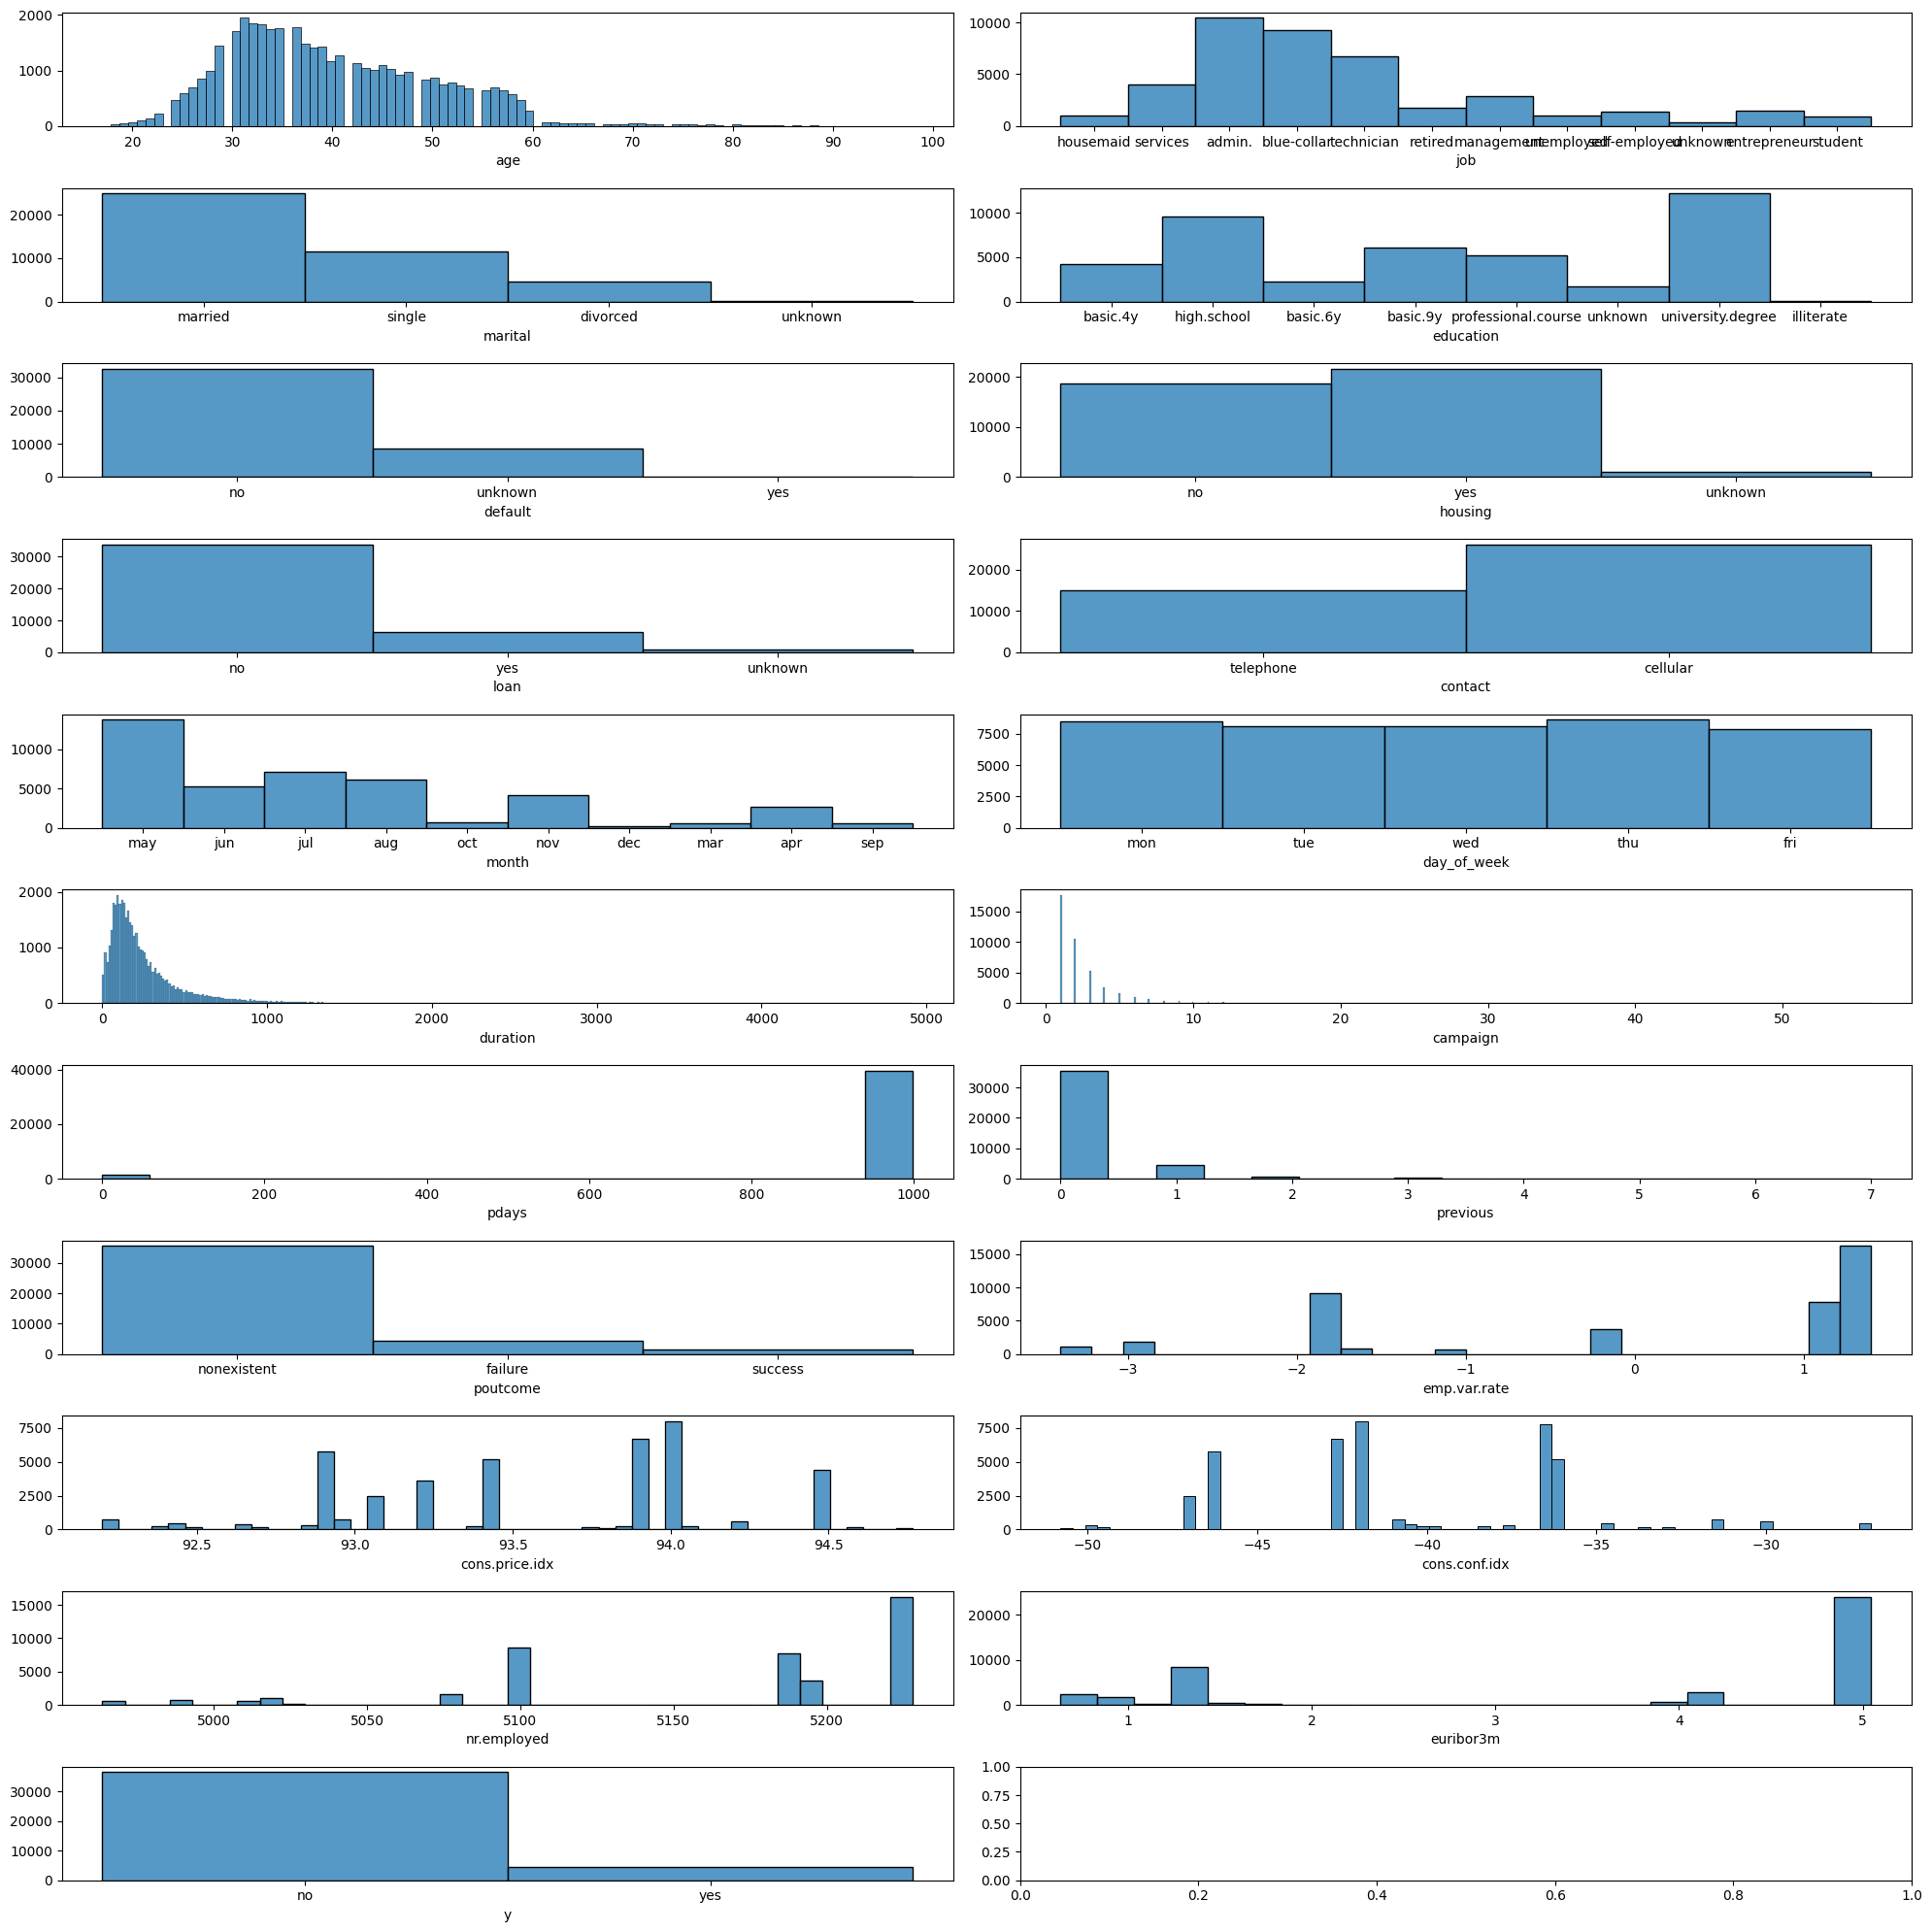

In [177]:
# Graphic analysis
fig, axis = plt.subplots(11, 2, figsize=(20, 20))

sns.histplot(ax=axis[0, 0], data=main_df, x='age').set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=main_df, x='job').set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=main_df, x='marital').set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=main_df, x='education').set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=main_df, x='default').set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=main_df, x='housing').set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=main_df, x='loan').set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=main_df, x='contact').set(ylabel=None)
sns.histplot(ax=axis[4, 0], data=main_df, x='month').set(ylabel=None)
sns.histplot(ax=axis[4, 1], data=main_df, x='day_of_week').set(ylabel=None)
sns.histplot(ax=axis[5, 0], data=main_df, x='duration').set(ylabel=None)
sns.histplot(ax=axis[5, 1], data=main_df, x='campaign').set(ylabel=None)
sns.histplot(ax=axis[6, 0], data=main_df, x='pdays').set(ylabel=None)
sns.histplot(ax=axis[6, 1], data=main_df, x='previous').set(ylabel=None)
sns.histplot(ax=axis[7, 0], data=main_df, x='poutcome').set(ylabel=None)
sns.histplot(ax=axis[7, 1], data=main_df, x='emp.var.rate').set(ylabel=None)
sns.histplot(ax=axis[8, 0], data=main_df, x='cons.price.idx').set(ylabel=None)
sns.histplot(ax=axis[8, 1], data=main_df, x='cons.conf.idx').set(ylabel=None)
sns.histplot(ax=axis[9, 0], data=main_df, x='nr.employed').set(ylabel=None)
sns.histplot(ax=axis[9, 1], data=main_df, x='euribor3m').set(ylabel=None)
sns.histplot(ax=axis[10, 0], data=main_df, x='y').set(ylabel=None)

plt.tight_layout()
plt.show()

Al ver que en varias columnas encontramos valores 'unknown' que en algunos casos probablemente no aportarán demasiado para obtener el resultado que se espera obtener, se procede a tratarlos como nulos, analizando cuáles son las columnas que los incluyen, cuál es el porcentaje y cómo se pueden tratar para que no influyan negativamente.

In [178]:
# Get unique values per column
job_unique = main_df['job'].unique()
marital_unique = main_df['marital'].unique()
education_unique = main_df['education'].unique()
default_unique = main_df['default'].unique()
housing_unique = main_df['housing'].unique()
loan_unique = main_df['loan'].unique()

print(f'Job:\n{job_unique}\n')
print(f'Marital:\n{marital_unique}\n')
print(f'Education:\n{education_unique}\n')
print(f'Default:\n{default_unique}\n')
print(f'Housing:\n{housing_unique}\n')
print(f'Loan:\n{loan_unique}\n')

Job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Marital:
['married' 'single' 'divorced' 'unknown']

Education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:
['no' 'unknown' 'yes']

Housing:
['no' 'yes' 'unknown']

Loan:
['no' 'yes' 'unknown']



In [179]:
# Get unknown per column
def get_unknowns(column):
    total = len(main_df[column])
    unknown_count = (main_df[column] == 'unknown').sum()
    return f"{column}: {unknown_count / total * 100:.2f}%"

print(get_unknowns('job'))
print(get_unknowns('marital'))
print(get_unknowns('education'))
print(get_unknowns('default'))
print(get_unknowns('housing'))
print(get_unknowns('loan'))

job: 0.80%
marital: 0.19%
education: 4.20%
default: 20.88%
housing: 2.40%
loan: 2.40%


Viendo la cantidad de unknowns por dato, se pasa a eliminar aquellos que suponen un porcentaje menor al 5% del dataset.

In [180]:
# def remove_unknowns(column):   
#     return main_df[main_df[column] != 'unknown']
# 
# initial_rows = main_df.shape[0]

# main_df = remove_unknowns('job')
# main_df = remove_unknowns('marital')
# main_df = remove_unknowns('education')
# main_df = remove_unknowns('housing')
# main_df = remove_unknowns('loan')

# final_rows = main_df.shape[0]

# percentage = ((initial_rows - final_rows) / initial_rows) * 100
# print(f'Percentage of droped rows: {round(percentage, 2)}%')

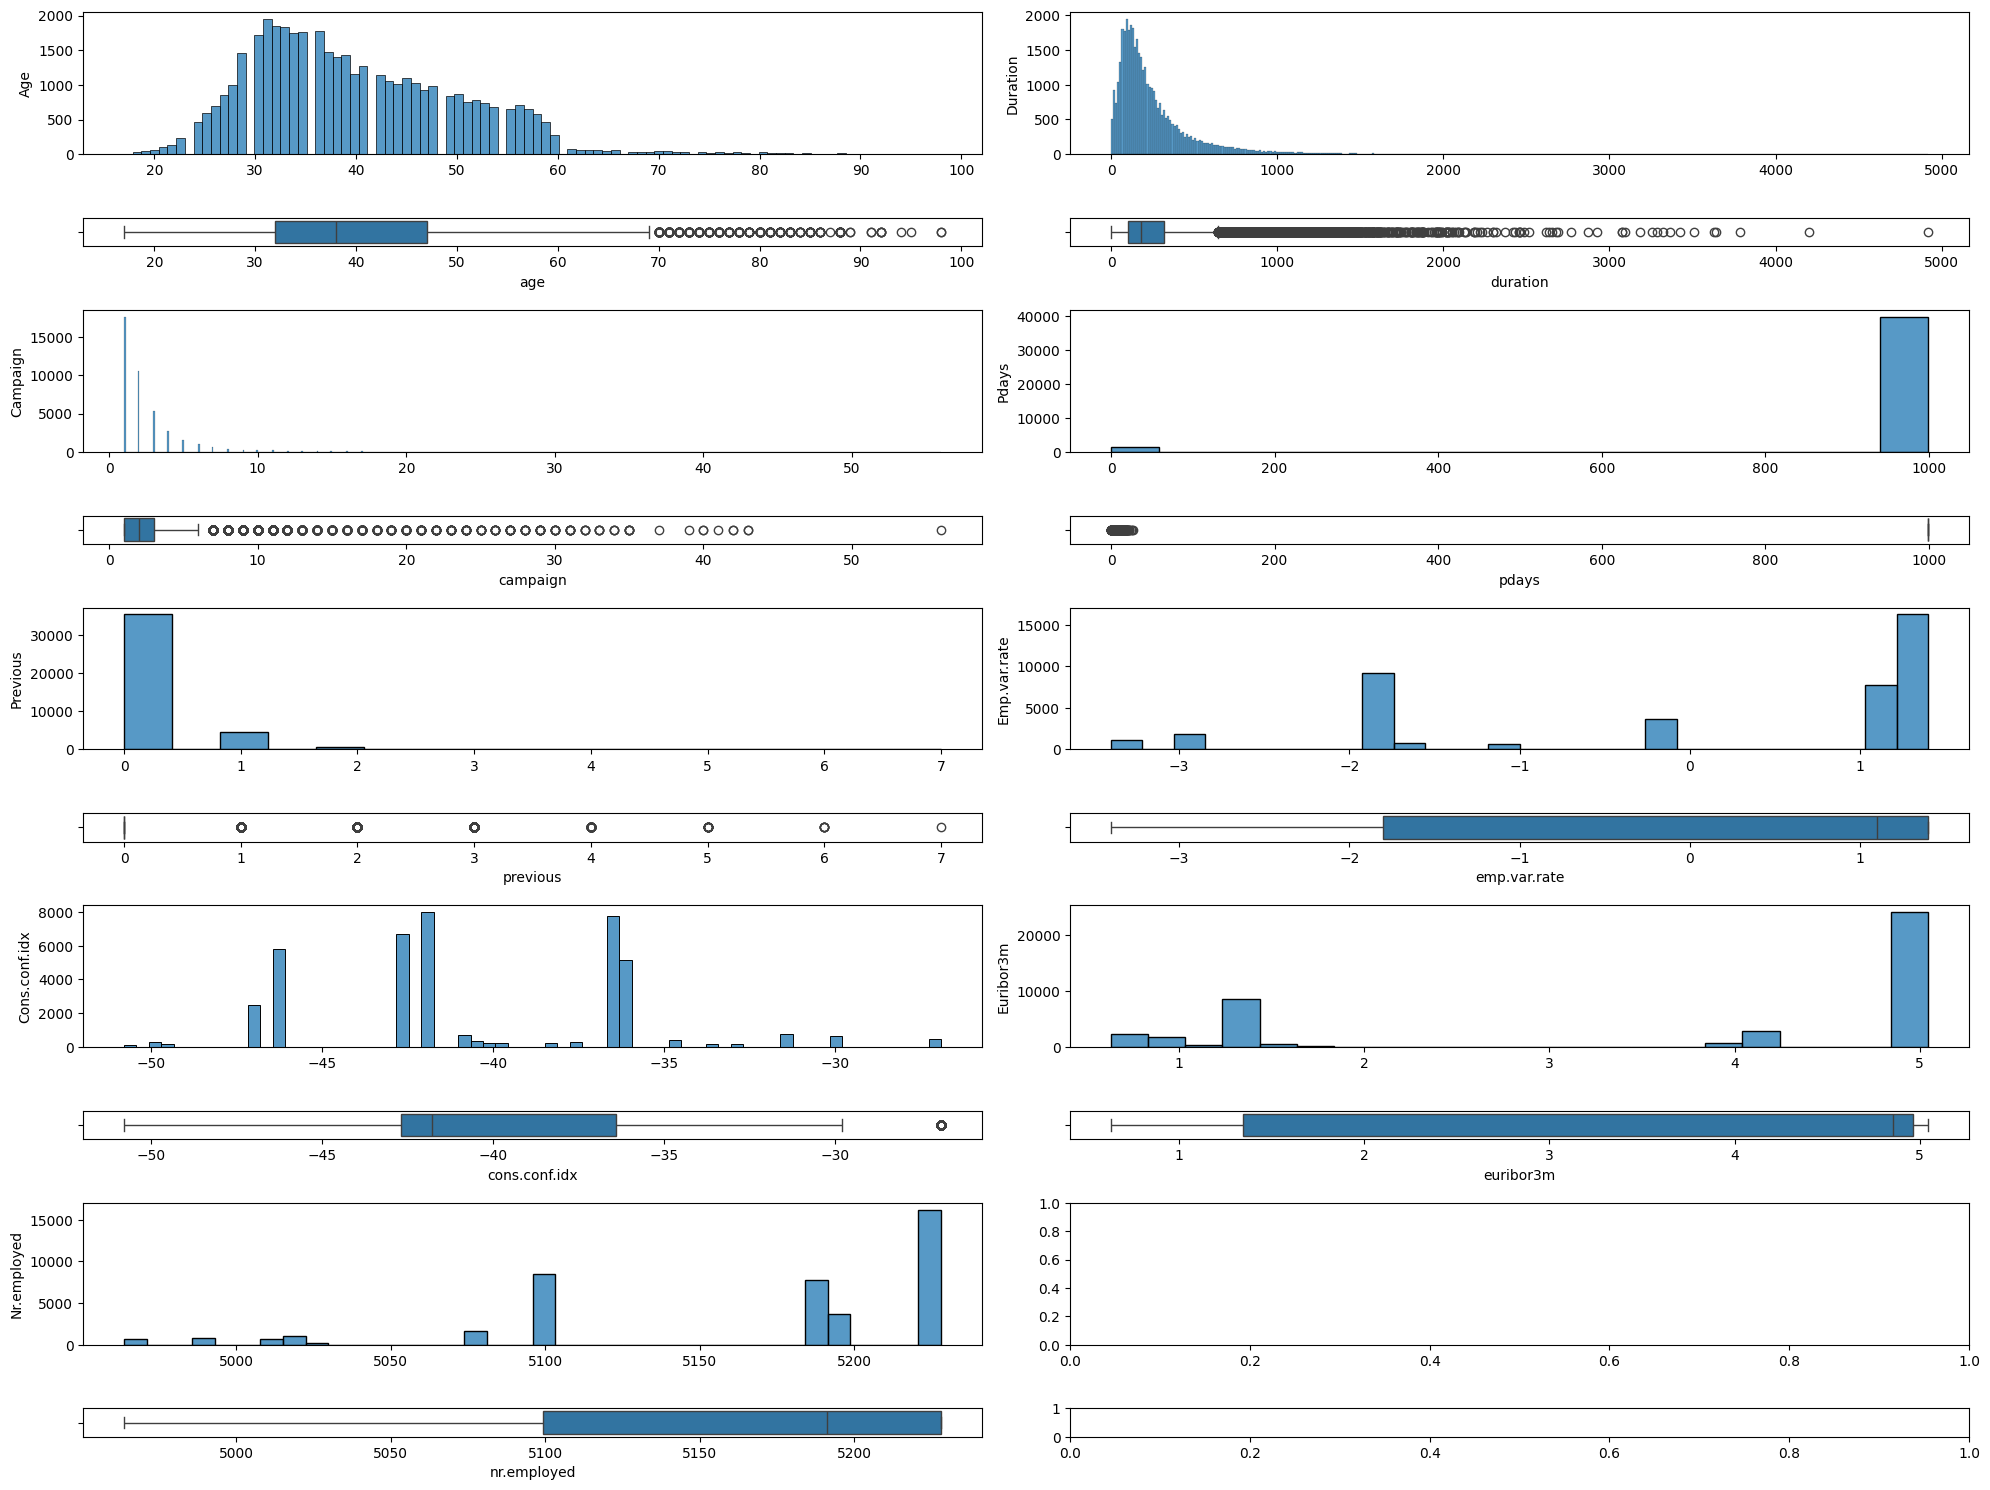

In [181]:
# Check outliers
fig, axis = plt.subplots(10, 2, figsize=(20, 15), gridspec_kw={'height_ratios': [10, 2] * 5})

sns.histplot(ax=axis[0, 0], data=main_df, x="age").set(xlabel=None)
axis[0, 0].set_ylabel('Age')
sns.boxplot(ax=axis[1, 0], data=main_df, x="age")

sns.histplot(ax=axis[0, 1], data=main_df, x="duration").set(xlabel=None)
axis[0, 1].set_ylabel('Duration')
sns.boxplot(ax=axis[1, 1], data=main_df, x="duration")

sns.histplot(ax=axis[2, 0], data=main_df, x="campaign").set(xlabel=None)
axis[2, 0].set_ylabel('Campaign')
sns.boxplot(ax=axis[3, 0], data=main_df, x="campaign")

sns.histplot(ax=axis[2, 1], data=main_df, x="pdays").set(xlabel=None)
axis[2, 1].set_ylabel('Pdays')
sns.boxplot(ax=axis[3, 1], data=main_df, x="pdays")

sns.histplot(ax=axis[4, 0], data=main_df, x="previous").set(xlabel=None)
axis[4, 0].set_ylabel('Previous')
sns.boxplot(ax=axis[5, 0], data=main_df, x="previous")

sns.histplot(ax=axis[4, 1], data=main_df, x="emp.var.rate").set(xlabel=None)
axis[4, 1].set_ylabel('Emp.var.rate')
sns.boxplot(ax=axis[5, 1], data=main_df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=main_df, x="cons.conf.idx").set(xlabel=None)
axis[6, 0].set_ylabel('Cons.conf.idx')
sns.boxplot(ax=axis[7, 0], data=main_df, x="cons.conf.idx")

sns.histplot(ax=axis[6, 1], data=main_df, x="euribor3m").set(xlabel=None)
axis[6, 1].set_ylabel('Euribor3m')
sns.boxplot(ax=axis[7, 1], data=main_df, x="euribor3m")

sns.histplot(ax=axis[8, 0], data=main_df, x="nr.employed").set(xlabel=None)
axis[8, 0].set_ylabel('Nr.employed')
sns.boxplot(ax=axis[9, 0], data=main_df, x="nr.employed")

plt.tight_layout()
plt.show()


Como vemos que en varios casos tenemos valores atípicos, calculamos la severidad y cantidad de los mismos para contemplar si pueden ser errores o si podemos mantenerlos en el dataset.

In [182]:
def get_Q_per_data(column):
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1

    quartiles = {
        'severe_lower': Q1 - 3 * IQR,
        'lower': Q1 - 1.5 * IQR,
        'upper': Q1 + 1.5 * IQR,
        'severe_upper': Q1 + 3 * IQR,
    }

    return quartiles

high_pdays = main_df[main_df['pdays'] >= get_Q_per_data('pdays')['severe_upper']]

total_pdays = main_df['pdays'].count()
high_pdays_count = high_pdays['pdays'].count()

print((high_pdays_count / total_pdays) * 100)


96.32067223625413


Al no encontrar una clara relación con los outliers, pasamos al análisis multivariante.

In [183]:
le = LabelEncoder()

main_df['num_y'] = le.fit_transform(main_df['y'])
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,num_y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


TypeError: can't multiply sequence by non-int of type 'float'

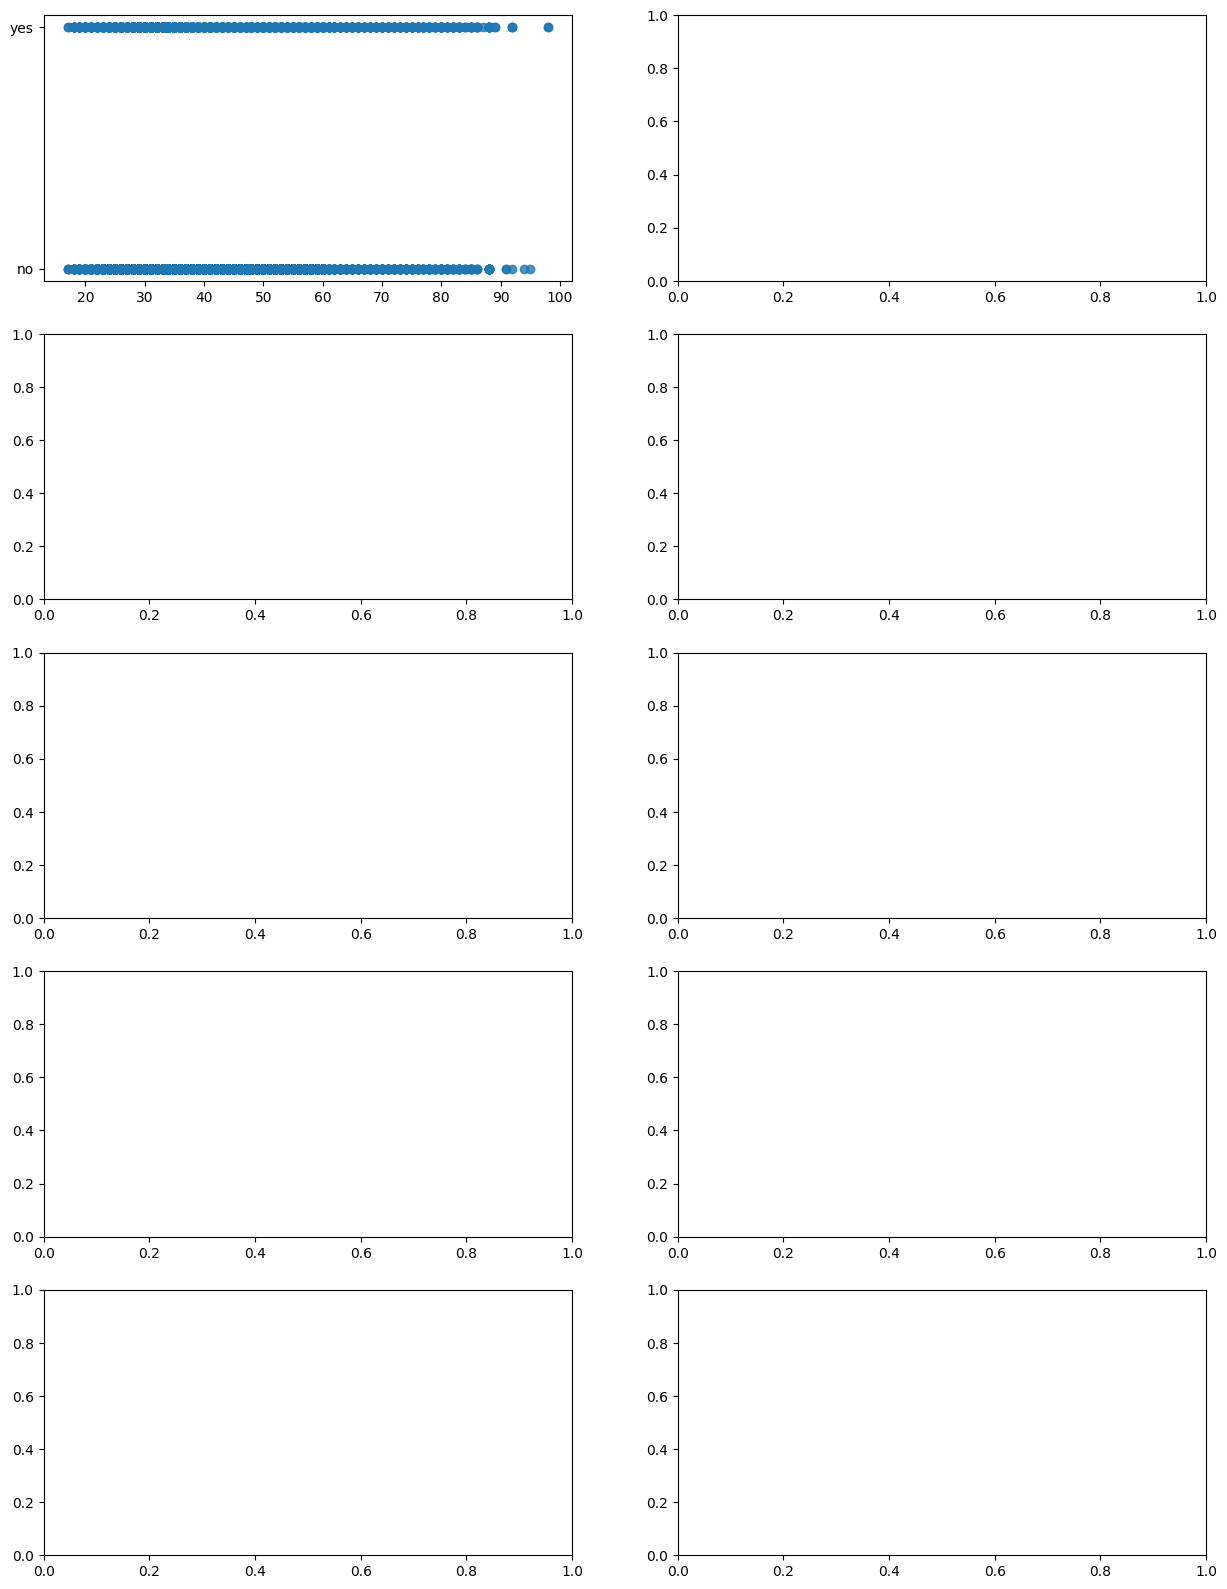

In [ ]:
# Numerical multivariate analysis
fig, axis = plt.subplots(5, 2, figsize=(15, 20))
sns.regplot(ax=axis[0, 1], data=main_df, x="duration", y="y").set(ylabel=None)
sns.heatmap(main_df[['num_y', 'duration']].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=main_df, x="campaign", y="y").set(ylabel=None)
sns.heatmap(main_df[['num_y', 'campaign']].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(ax=axis[2, 1], data=main_df, x="pdays", y="y").set(ylabel=None)
sns.heatmap(main_df[['num_y', 'pdays']].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=main_df, x="previous", y="y").set(ylabel=None)
sns.heatmap(main_df[['num_y', 'previous']].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)
sns.regplot(ax=axis[0, 0], data=main_df, x="age", y="y").set(ylabel=None)
sns.heatmap(main_df[['num_y', 'age']].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

plt.tight_layout()
plt.show()